In [1]:
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime
import numpy as np
import pandas as pd
import time
import re
from tqdm import tqdm

# Get Links for Scraping

In [39]:
seed_address_list=[]
seed_page="https://www.immoregion.fr/vente/maison?page="

for i in range(1,500,1):
    current_page=seed_page+str(i)
    page=requests.get(current_page)
    page_content=BeautifulSoup(page.content,"html.parser")
    for link in page_content.find_all("a",{"href" : re.compile('/vente/maison/*/')}):
        if "id-" in link["href"]:
            seed_address_list.append("https://www.immoregion.fr"+link["href"])
    print("{} round".format(i))
    time.sleep(1)
seed_address_list=list(np.unique(seed_address_list))

1 round
2 round
3 round
4 round
5 round
6 round
7 round
8 round
9 round
10 round
11 round
12 round
13 round
14 round
15 round
16 round
17 round
18 round
19 round
20 round
21 round
22 round
23 round
24 round
25 round
26 round
27 round
28 round
29 round
30 round
31 round
32 round
33 round
34 round
35 round
36 round
37 round
38 round
39 round
40 round
41 round
42 round
43 round
44 round
45 round
46 round
47 round
48 round
49 round
50 round
51 round
52 round
53 round
54 round
55 round
56 round
57 round
58 round
59 round
60 round
61 round
62 round
63 round
64 round
65 round
66 round
67 round
68 round
69 round
70 round
71 round
72 round
73 round
74 round
75 round
76 round
77 round
78 round
79 round
80 round
81 round
82 round
83 round
84 round
85 round
86 round
87 round
88 round
89 round
90 round
91 round
92 round
93 round
94 round
95 round
96 round
97 round
98 round
99 round
100 round
101 round
102 round
103 round
104 round
105 round
106 round
107 round
108 round
109 round
110 round
111 roun

In [40]:
len(seed_address_list)

9963

# Scraping

In [4]:
json_list=[]
for link in tqdm(seed_address_list):
    try:
        #get page content into a var
        page=requests.get(link)
        if page.status_code==200:
            page_content=BeautifulSoup(page.content,"html.parser")
        
        #define the general structure of the data we want to get and squeeze it into a dictionary
            var_names=["ref","constr_year","address","price","price_wo_agency_fee","agency_fee","Honoraires_à_la_charge","area","salon_area","integral_area","furnished","nmbr_of_bathrooms","nmbr_of_bedrooms","nmbr_of_rooms","nmbr_of_sep_toilettes","nmbr_of_shower_rooms","description","kitchen_equiped","open_kitchen","link_addres","scrapping_time","agency","terrasse","parkinglots","cave","pool","Buanderie","furnished_attic","Chimney","Jardin","parkinglots_garage","renovated","energetic_perf","CO2_emission","parquet_flooring","geothermic_heating","solar_panels","gas_heating","wine_cave"]
            json_data={feat:np.nan for feat in var_names}

        #on website there 6 parts containing interesting info, looping through all parts to get the information needed to fill in the dictionary defined above
        for  container in page_content.find_all("div",class_="feature-bloc"):
            if "Détails de la vente" in container.find_all("div",class_="feature-bloc-content-title-name")[0].text:
                for elements in container.find_all("ul",class_="feature-bloc-content-specification")[0].find_all("li"):
                    if elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Prix de vente":
                        json_data["price"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Prix hors honoraires":
                        json_data["price_wo_agency_fee"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Meublé":
                        json_data["furnished"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Honoraires d'agence":
                        json_data["agency_fee"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Honoraires à la charge":
                        json_data["Honoraires_à_la_charge"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text  
                        

            elif "Général" in container.find_all("div",class_="feature-bloc-content-title-name")[0].text:
                for elements in container.find_all("ul",class_="feature-bloc-content-specification")[0].find_all("li"):
                    if elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Surface":
                        json_data["area"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Terrain":
                        json_data["integral_area"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Nombre de pièces":
                        json_data["nmbr_of_rooms"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Nombre de chambres":
                        json_data["nmbr_of_bedrooms"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Année de construction":
                        json_data["constr_year"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Rénové":
                        json_data["renovated"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text

            elif "Intérieur" in container.find_all("div",class_="feature-bloc-content-title-name")[0].text:
                for elements in container.find_all("ul",class_="feature-bloc-content-specification")[0].find_all("li"):
                    if elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Salon":
                        json_data["salon_area"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Salles de bain":
                        json_data["nmbr_of_bathrooms"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Toilettes séparées":
                        json_data["nmbr_of_sep_toilettes"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Salles de douche":
                        json_data["nmbr_of_shower_rooms"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Cuisine ouverte":
                        json_data["open_kitchen"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Cuisine équipée":
                        json_data["kitchen_equiped"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    

            elif "Extérieur" in container.find_all("div",class_="feature-bloc-content-title-name")[0].text:
                for elements in container.find_all("ul",class_="feature-bloc-content-specification")[0].find_all("li"):
                    if elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Terrasse":
                        json_data["terrasse"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Place(s) de parking en extérieur":
                        json_data["parkinglots"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Jardin":
                        json_data["Jardin"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Place(s) de parking dans un garage":
                        json_data["parkinglots_garage"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    
                        
            elif "Autres" in container.find_all("div",class_="feature-bloc-content-title-name")[0].text:
                for elements in container.find_all("ul",class_="feature-bloc-content-specification")[0].find_all("li"):
                    if elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Cave":
                        json_data["cave"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Piscine":
                        json_data["pool"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Buanderie":
                        json_data["Buanderie"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Cheminée":
                        json_data["Chimney"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text        
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Grenier aménagé":
                        json_data["furnished_attic"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Parquet":
                        json_data["parquet_flooring"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Cave à vin":
                        json_data["wine_cave"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
            
            elif "Energie / Chauffage" in container.find_all("div",class_="feature-bloc-content-title-name")[0].text:
                for elements in container.find_all("ul",class_="feature-bloc-content-specification")[0].find_all("li"):
                    if elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Diagnostique de performance énergétique (DPE)":
                        json_data["energetic_perf"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Emission de gaz à effet de serre (GES)":
                        json_data["CO2_emission"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Chauffage au gaz":
                        json_data["gas_heating"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Chauffage géothermique":
                        json_data["geothermic_heating"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
                    elif elements.find_all("div",class_="feature-bloc-content-specification-content-name")[0].text=="Panneaux solaires":
                        json_data["solar_panels"]=elements.find_all("div",class_="feature-bloc-content-specification-content-response")[0].text
            
        json_data["ref"]=page_content.find_all("h1",class_="KeyInfoBlockStyle__PdpTitle-sc-1o1h56e-2 hWEtva")[0].find_all("span")[0].text 
        json_data["description"]=page_content.find_all("div",class_="DescriptionStyle__DescriptionContentDropdown-dqxmgt-3 dyQEIL")[0].find_all("div")[0].text
        json_data["link_address"]=link
        json_data["scrapping_time"]=datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        json_data["agency"]=page_content.find_all("h3",class_="FormAgencyInfoStyle__AgencyName-sc-10hhmvq-5 jfZIgK")[0].text
        json_data["address"]=page_content.find_all("div",class_="block-localisation-address")[0].text
        json_list.append(json_data)
        time.sleep(2)
    except:
        pass


100%|██████████| 180/180 [08:14<00:00,  2.75s/it]


# Example: Plotting Price-Distribution

In [17]:
import unidecode
df=pd.DataFrame(json_list)

In [28]:
 df["price"]=[unidecode.unidecode(x.replace("€","")) for x in df["price"]]
 df["price"]=[float(x.replace(" ","")) for x in df["price"]]
 df["price"].head()

0     58000.0
1    128800.0
2    139000.0
3    140000.0
4    427000.0
Name: price, dtype: float64

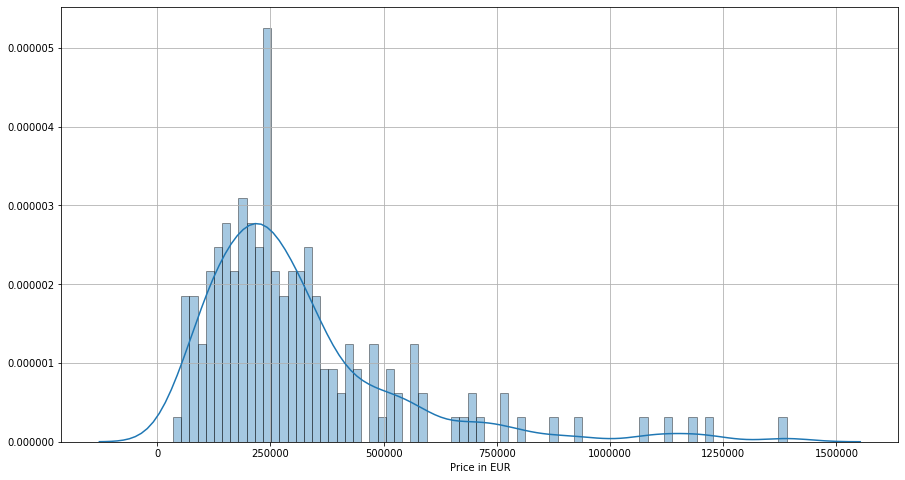

In [36]:
fig,sub=plt.subplots(1,1,figsize=(15,8))
sns.distplot(df["price"],ax=sub,hist_kws={"edgecolor":"black"},bins=75)
sub.grid()
sub.set_xlabel("Price in EUR");